## 1. 청원 데이터 전처리
- 청원 데이터 원자료를 정규표현식으로 전처리하고 최종 토큰화 시도까지 한 내용을 담았습니다
- 본 노트에서는 Okt를 이용하여 토크나징을 시도하였지만 토큰화 시간이 23분이 걸려서 최종으로는 Mecab 토크나이저를 사용하게 되었습니다

In [ ]:
# 전처리3에서 한 내용 모두 수행

from petitions_dataset import Petitions

petitions = Petitions("C:/Users/myunghoon_k/OneDrive - 서울시립대학교/bitamin/NLP_summer/nlp_bitamin/petitions_data")

petitions.set_keys('begin', 'category', 'title', 'content','num_agree')

result = []
for begin, category, title, content, num_agree in petitions:
    temp = []
    temp.append(begin)
    temp.append(category)
    temp.append(title)
    temp.append(content)
    temp.append(num_agree)
    result.append(temp)

In [2]:
import pandas as pd

df_first = pd.DataFrame(result, columns = ['begin', 'category', 'title', 'content',
        'num_agree'])

In [3]:
test = df_first.num_agree.apply(lambda x: 1 if x >=200000 else 0)
df_first['new_status'] = test

In [4]:
import re

raw_title = list(df_first['title'])

result = []
error_index = []
i = 0

for text in raw_title:
    i +=1
    try:
        text_sp = text.split()
        text_join = ''.join(text_sp)
        text_sub = re.sub(r'[,$()*+.?[\^{|]+', '', text_join)
        result += [text_sub]
    except AttributeError as error:
        error_index.append(i)

In [5]:
test = pd.DataFrame(result, columns = ['mod_title'])
mt_isin = test['mod_title'].duplicated()
fal_ind = test[mt_isin].index #중복된 데이터들이 존재하는 인덱스 추출

In [6]:
df2 = df_first.copy()
df2 = pd.concat([df2, test], axis = 1)
cols = ['begin', 'category', 'title', 'mod_title', 'content', 'num_agree', 'new_status']
df2 = df2[cols]
df2.head()

,begin,category,title,mod_title,content,num_agree,new_status
0,2017-08-25,육아/교육,"학교는 인력센터, 취업센터가 아닙니다. 정말 간곡히 부탁드립니다.",학교는인력센터취업센터가아닙니다정말간곡히부탁드립니다,"안녕하세요. 현재 사대, 교대 등 교원양성학교들의 예비교사들이 임용절벽에 매우 힘들...",88,0
1,2017-08-25,안전/환경,아파트 물탱크 청소용 NEP인증세제 사용 강제 요청건의서,아파트물탱크청소용NEP인증세제사용강제요청건의서,서울시에서는 ’10년부터 정수지와 배수지 청소용 화학제품인 “세정제”에 대하여 첨부...,2,0
2,2017-08-25,기타,DDT농가에 대한 배려,DDT농가에대한배려,얼마 전 살충제 계란 파동 등으로 씨끄러웠던 중 친환경업체(한살림 등)의 DDT파동...,1,0
3,2017-08-25,반려동물,길고양이를 도와주세요,길고양이를도와주세요,길고양이들 밥주고있는 사람입니다. 최근에 동네주민과 트러블이 생겨 싸움이 일어났습니...,5,0
4,2017-08-25,인권/성평등,몰래카메라 유출 방송통신심의위원회 심의 배정,몰래카메라유출방송통신심의위원회심의배정,안녕하세요 지인분이 성관계 몰래카메라가 유출되어 방송통신 심의 위원회에 접수해서 처...,1,0


In [7]:
df2.drop_duplicates(subset = ['mod_title'], inplace = True)
df2.shape #중복 제목 제거 완료

(314401, 7)

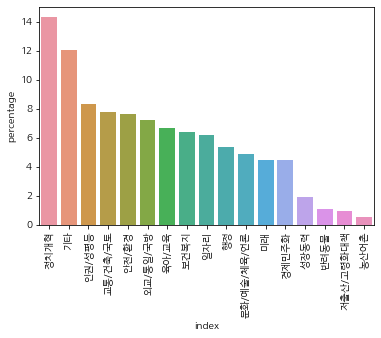

In [9]:
#기타카테고리 다시 시각화
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
plt.rcParams["font.family"] = font_name

category_ratio = (df2['category']
                             .value_counts(normalize = True)
                             .rename('percentage')
                             .mul(100)
                            .reset_index()
                            .sort_values('percentage', ascending = False))
p = sns.barplot(x="index", y="percentage", data=category_ratio)
plt.setp(p.get_xticklabels(), rotation=90)
plt.show()
    #정치개혁 분야가 2%p가까이 비율 하락
    #기타는 여전히 12%에 해당
    #시간에 따른 카테고리별 변화 시각화도 필요
    #시간에 따른 콘텐츠 구성 단어들의 변화 (워드 클라우드?)

In [11]:
#텍스트 내용 전처리

#불용어를 어떻게 투입할 것인지?
#특수문자 제거를 어떻게 할 것인지?
#url제거를 어떻게 할 것인지?
#target을 어떻게 정수형으로 변환할 것인지?

#우리에게는 총 17개의 카테고리가 있음
#명사기반 토큰화를 해야할것 (청원의 목적이 명사에 담겨 있다는 가정, 믿음)

#우리의 모델, count기반 모델 (DTM)
#tf-idf생성
#tf-idf생성 이후 어떻게 차원 축소?

In [8]:
#불용어 불러오기
stopwords_kr = pd.read_csv("C:/Users/myunghoon_k/OneDrive - 서울시립대학교/bitamin/NLP_summer/nlp_bitamin/stopwords_kr.txt",
                          sep = '\n', header = None)
stop_kr_list = list(stopwords_kr.iloc[:,0])
    #리스트 형태로 변환함

In [24]:
#타겟 정수형태로 
#0,1,.....16 형태로 정수 인코딩을 실시할 것인지? => sklearn에서 제공한다고 함
#0,1형태의 원핫인코딩으로 할 것인지? => 주로 딥러닝 모델의 target으로 사용된다고 함
#https://datascience.stackexchange.com/questions/71842/what-should-i-do-if-my-target-variable-is-categorical-when-using-decision-tree

#딱히 정수인코딩을 시행하지 않은 상태로 도전해보고 해볼것

In [9]:
#토큰화 시작, 형태소 분석기 성능 비교자료
#https://iostream.tistory.com/144
#이 자료에 따라서 OKT분석기를 써보겠음

#2017-11-01의 콘텐츠 중 하나로 사용해보기

#1. 문장 정제 처리
#한 콘텐트츠로만 전처리 테스트 해보기
#url, 특수문자 제거, 불용어 처리

df2.reset_index(drop = True, inplace = True) #인덱스 초기화
mask = (df2.begin == '2017-11-01') & (df2.category == '외교/통일/국방')
df2.loc[mask, :] #여기서 14965번째 인덱스의 내용을 사용할 것

,begin,category,title,mod_title,content,num_agree,new_status
14799,2017-11-01,외교/통일/국방,병역의무 폐지를 청원합니다,병역의무폐지를청원합니다,모병제가 언급 될때마다 인터넷상에서 남성들이 반대하는데 모병에 의해 군대 갈수 있는...,10,0
14800,2017-11-01,외교/통일/국방,중국에 대한 외교 정책을 재고려해주십시오.,중국에대한외교정책을재고려해주십시오,0) 서론 과거 삼국 시대부터 중국이란 국가는 대한민국에게 온갖 극악무도한 만행을 ...,0,0
14840,2017-11-01,외교/통일/국방,여자 병사들은 가산점도 주고 특별수당 포함 월급 140줄거라고 하시는데,여자병사들은가산점도주고특별수당포함월급140줄거라고하시는데,저희 남자들 사실상 끌려오는거니까 특별수당이랑 가산점 주십시오!!!!남녀 평등한 세...,2,0
14853,2017-11-01,외교/통일/국방,여병제도 폐지 및 전환,여병제도폐지및전환,월급 140에 여군병사를 모집?? 그럼 남자는 3~40만원 받는데 이게 정부식 남녀...,961,0
14861,2017-11-01,외교/통일/국방,"독립투사 박차정의 묘, 정식 관리 건",독립투사박차정의묘정식관리건,일제에 맞서 전쟁중에 순국하신 항일 투사 박차정의 묘를 정식으로 관리 요청 합니다....,1,0
14867,2017-11-01,외교/통일/국방,여군병사 상근예비역 대체(월급 140?) 반대,여군병사상근예비역대체월급140반대,남자 사병 월급은 딸랑 10만원 올려주는것도 가산점 다 빼고 3~4년 걸쳐서 겨우겨...,29,0
14870,2017-11-01,외교/통일/국방,asd,asd,asd,0,0
14872,2017-11-01,외교/통일/국방,여군병사제,여군병사제,군대가는 남자는 호구인가요?? 남자 병사는 의무라 쥐꼬리만한 월급주고 개처럼 부리고...,6,0
14876,2017-11-01,외교/통일/국방,군모병제,군모병제,여성병사모집제를 다시 진행한다고 들었는데 조건을 보니 어이가 없네요. 월급은 남성병...,2,0
14881,2017-11-01,외교/통일/국방,여성병사 징병 제도 반대합니다.,여성병사징병제도반대합니다,"현재 우리나라는 국방의 의무는 남녀 모두에게, 병역의 의무는 오직 ""남성""에게만 적...",86,0


In [58]:
#실험 콘텐츠
test_con = df2.iloc[14965,4]
test_con

'미국의 MK울트라 프로젝트는 실제로 있었던 일이며 https://namu.wiki/w/MK%20%EC%9A%B8%ED%8A%B8%EB%9D%BC (첫번째링크의 1.2 그것이 실제로 일어났습니다 참고) 미국 클린턴 행정부가 국민에게 사과하고 피해자에게 보상하였던 사건입니다. 한국에서도 어느덧 피해자가 늘어나더니 관련 인터넷 카페만 여러개입니다. 그런데 문제는 진짜 정신분열증(조현병)환자들과 뒤섞여 무엇이 진실인지 피해자들의 입으로는 알기가 어렵고 한국형 MK울트라 프로젝트 진행하는 알바들까지 까페에 침투하여 조현병으로 몰아가 사회적으로 목소리를 내기 어렵습니다. 참고로 저는 2010년 전화로 국정원에 문의하였더니 "마인드 컨트롤은 없습니다"라는 짤막한 답변만 들었고 그런데 올해는 있다없다 말도 없습니다. 인권 존엄성 등을 논하기 앞서 국정원의 묻지마 예산이 문제라고 생각합니다. 대북방첩활동은 뒷전으로 하고 쓸데없는 정치개입이나 하고 사회공작을 벌여 여러 자살사건을 양산하고 있는데 이런 한국형 MK울트라 프로젝트도 적폐중의 하나입니다. 모든 예산에 개입하는 국정원 기조실장은 반드시 존재를 알 것입니다. 이헌수 전 국정원 기조실장 및 구속된 국정원 전현직 간부들을 취조하여MK울트라의 실체와 시민불법사찰을 밝혀 주십시오. 그리고 설령 세상에 밝힐수 없더라도 MB,박근혜를 좀 비판했다고 무작위로 피해자가 된 사람들은 좀 구제해 주시고 차후 이런일이 발생하지 않도록 하여 주십시오. 피해보상까지는 바라지도 않습니다. 읽어주셔서 감사합니다.'

In [102]:
#정규표현식 사용
#url 제거
import re
url_with_https = re.compile(r'(https?:\/\/){1,}([\w.\/%-]+){1,}')
print(url_with_https.search(test_con)[0])
    #https: 라고 달아져있어야 추출이 가능함...
    #https:가 없는 경우에는 어떻게 추출?
    
mod_test_con = url_with_https.sub(repl = '', string = test_con)
print('\n',mod_test_con)

https://namu.wiki/w/MK%20%EC%9A%B8%ED%8A%B8%EB%9D%BC

 미국의 MK울트라 프로젝트는 실제로 있었던 일이며  (첫번째링크의 1.2 그것이 실제로 일어났습니다 참고) 미국 클린턴 행정부가 국민에게 사과하고 피해자에게 보상하였던 사건입니다. 한국에서도 어느덧 피해자가 늘어나더니 관련 인터넷 카페만 여러개입니다. 그런데 문제는 진짜 정신분열증(조현병)환자들과 뒤섞여 무엇이 진실인지 피해자들의 입으로는 알기가 어렵고 한국형 MK울트라 프로젝트 진행하는 알바들까지 까페에 침투하여 조현병으로 몰아가 사회적으로 목소리를 내기 어렵습니다. 참고로 저는 2010년 전화로 국정원에 문의하였더니 "마인드 컨트롤은 없습니다"라는 짤막한 답변만 들었고 그런데 올해는 있다없다 말도 없습니다. 인권 존엄성 등을 논하기 앞서 국정원의 묻지마 예산이 문제라고 생각합니다. 대북방첩활동은 뒷전으로 하고 쓸데없는 정치개입이나 하고 사회공작을 벌여 여러 자살사건을 양산하고 있는데 이런 한국형 MK울트라 프로젝트도 적폐중의 하나입니다. 모든 예산에 개입하는 국정원 기조실장은 반드시 존재를 알 것입니다. 이헌수 전 국정원 기조실장 및 구속된 국정원 전현직 간부들을 취조하여MK울트라의 실체와 시민불법사찰을 밝혀 주십시오. 그리고 설령 세상에 밝힐수 없더라도 MB,박근혜를 좀 비판했다고 무작위로 피해자가 된 사람들은 좀 구제해 주시고 차후 이런일이 발생하지 않도록 하여 주십시오. 피해보상까지는 바라지도 않습니다. 읽어주셔서 감사합니다.


In [103]:
#특수문자, 숫자제거
useless_words = re.compile(r'[\(\)\"\']+')
print(useless_words.findall(mod_test_con))
mod_test_con = useless_words.sub('', mod_test_con)

rm_num = re.compile(r'(\d+\.?\,?\d+)+')
print(rm_num.findall(mod_test_con))
mod_test_con = rm_num.sub('', mod_test_con)
print('\n',mod_test_con)

['(', ')', '(', ')', '"', '"']
['1.2', '2010']

 미국의 MK울트라 프로젝트는 실제로 있었던 일이며  첫번째링크의  그것이 실제로 일어났습니다 참고 미국 클린턴 행정부가 국민에게 사과하고 피해자에게 보상하였던 사건입니다. 한국에서도 어느덧 피해자가 늘어나더니 관련 인터넷 카페만 여러개입니다. 그런데 문제는 진짜 정신분열증조현병환자들과 뒤섞여 무엇이 진실인지 피해자들의 입으로는 알기가 어렵고 한국형 MK울트라 프로젝트 진행하는 알바들까지 까페에 침투하여 조현병으로 몰아가 사회적으로 목소리를 내기 어렵습니다. 참고로 저는 년 전화로 국정원에 문의하였더니 마인드 컨트롤은 없습니다라는 짤막한 답변만 들었고 그런데 올해는 있다없다 말도 없습니다. 인권 존엄성 등을 논하기 앞서 국정원의 묻지마 예산이 문제라고 생각합니다. 대북방첩활동은 뒷전으로 하고 쓸데없는 정치개입이나 하고 사회공작을 벌여 여러 자살사건을 양산하고 있는데 이런 한국형 MK울트라 프로젝트도 적폐중의 하나입니다. 모든 예산에 개입하는 국정원 기조실장은 반드시 존재를 알 것입니다. 이헌수 전 국정원 기조실장 및 구속된 국정원 전현직 간부들을 취조하여MK울트라의 실체와 시민불법사찰을 밝혀 주십시오. 그리고 설령 세상에 밝힐수 없더라도 MB,박근혜를 좀 비판했다고 무작위로 피해자가 된 사람들은 좀 구제해 주시고 차후 이런일이 발생하지 않도록 하여 주십시오. 피해보상까지는 바라지도 않습니다. 읽어주셔서 감사합니다.


In [ ]:
#이메일 제거작업

In [11]:
#전체 텍스트 전처리 시도
#전처리하고자 하는 내용을 담은 사용자 정의 함수 실행
url_with_https = re.compile(r'(https?:\/\/){1,}([\w.\/%-]+){1,}')
rm_email = re.compile(r'([a-zA-Z0-9\.\_]+)@([\w\.]+){1,}')
useless_words = re.compile(r'[\(\)\"\'\∎\=\-\<\>\★\○]+')
rm_num = re.compile(r'(\d+\.?\,?\d+)+')

def clean_kor_text(kor_text):
    text = url_with_https.sub('',kor_text)
    text = rm_email.sub('', text)
    text = useless_words.sub('',text)
    text = rm_num.sub('',text)
    text = ' '.join(word for word in text.split() if word not in stop_kr_list)
    return text

df2['mod_content'] = df2['content'].apply(clean_kor_text)

In [126]:
df2['mod_content'] = df2['content'].apply(clean_kor_text)
    #for문 돌릴필요 없이 시리즈에서 바로 apply 가능

In [14]:
df2.drop('mod_title', axis =1, inplace = True)
df2.head()

,begin,category,title,content,num_agree,new_status,mod_content
0,2017-08-25,육아/교육,"학교는 인력센터, 취업센터가 아닙니다. 정말 간곡히 부탁드립니다.","안녕하세요. 현재 사대, 교대 등 교원양성학교들의 예비교사들이 임용절벽에 매우 힘들...",88,0,"안녕하세요. 현재 사대, 교대 교원양성학교들의 예비교사들이 임용절벽에 매우 힘들어 ..."
1,2017-08-25,안전/환경,아파트 물탱크 청소용 NEP인증세제 사용 강제 요청건의서,서울시에서는 ’10년부터 정수지와 배수지 청소용 화학제품인 “세정제”에 대하여 첨부...,2,0,서울시에서는 ’년부터 정수지와 배수지 청소용 화학제품인 “세정제”에 첨부 자체 성분...
2,2017-08-25,기타,DDT농가에 대한 배려,얼마 전 살충제 계란 파동 등으로 씨끄러웠던 중 친환경업체(한살림 등)의 DDT파동...,1,0,전 살충제 계란 파동 등으로 씨끄러웠던 중 친환경업체한살림 등의 DDT파동으로 다시...
3,2017-08-25,반려동물,길고양이를 도와주세요,길고양이들 밥주고있는 사람입니다. 최근에 동네주민과 트러블이 생겨 싸움이 일어났습니...,5,0,길고양이들 밥주고있는 사람입니다. 최근에 동네주민과 트러블이 생겨 싸움이 일어났습니...
4,2017-08-25,인권/성평등,몰래카메라 유출 방송통신심의위원회 심의 배정,안녕하세요 지인분이 성관계 몰래카메라가 유출되어 방송통신 심의 위원회에 접수해서 처...,1,0,안녕하세요 지인분이 성관계 몰래카메라가 유출되어 방송통신 심의 위원회에 접수해서 처...


In [15]:
#토큰화 실시
#konlpy의 Okt 형태소 분석기로
from konlpy.tag import Okt

okt = Okt(max_heap_size = 1024*6) 
test_list_cont = list(df2['mod_content'])

def get_nouns(doc):
    return okt.nouns(doc)

    #08.04 새벽발견 이슈
    #out_of_memory 문제 발생
    #관련 이슈
    #https://github.com/konlpy/konlpy/issues/93 

In [144]:
#시간측정
import time
start_time = time.time()
quit_time = time.time()
print('소요시간:', start_time - quit_time)

소요시간: 0.0


In [171]:
#데이터가 너무 많아서 오래걸릴수 있으니 1만 단위로 해보기
df3 = df2.copy()
df3 = df3.iloc[:10000, 7]
start_time = time.time()
df3['cont_noun'] = df3.apply(get_nouns)
print('소요시간: ', start_time - time.time())
    #166초 = 2분 40초?

소요시간:  -165.52349829673767


In [176]:
df3

0            안녕하세요. 현재 사대, 교대 교원양성학교들의 예비교사들이 임용절벽에 매우 힘들어 ...
1            서울시에서는 ’년부터 정수지와 배수지 청소용 화학제품인 “세정제”에 첨부 자체 성분...
2            전 살충제 계란 파동 등으로 씨끄러웠던 중 친환경업체한살림 등의 DDT파동으로 다시...
3            길고양이들 밥주고있는 사람입니다. 최근에 동네주민과 트러블이 생겨 싸움이 일어났습니...
4            안녕하세요 지인분이 성관계 몰래카메라가 유출되어 방송통신 심의 위원회에 접수해서 처...
                                   ...                        
9996               거기 비리가 수두룩합니다~국민세금이 그쪽에서 샙니다. 조사한번 부탁 드립니다~
9997         무궁화 국민 헌장 한국 저작권 위원회 제C호 사단법인 대한민국 무궁화선양회는 우리나...
9998         회사퇴직후 일용직근로자로 공사현장에서 일하고 있습니다. 요즘같은 추석연휴에 공사현장...
9999         생의 꼭 필요 한 종이 한 장. 아름다운 훌륭한 삶 인생이 세상을 살아가며 물이 흐...
cont_noun    0       [현재, 사대, 교대, 교원양성, 학교, 예비교, 임용, 절벽, 매우...
Name: mod_content, Length: 10001, dtype: object

In [165]:
#프로세스
#1만단위로 끊어서 작업을 자동화
slice_test = [i for i in range(10000)]
sl_1 = slice_test[:5000]
sl_2 = slice_test[5000:]

print(sl_1[0],sl_1[-1])
print(sl_2[0], sl_2[-1])

0 4999
5000 9999


In [188]:
slice_list = [i for i in range(0, 100000, 10000)]
raw_list = [i for i in df2.index]

#인덱싱 연습
for i in range(len(slice_list)):
    if i <= 8:
        print(slice_list[i], slice_list[i+1])
    else:
        print(slice_list[i], 100000)

0 10000
10000 20000
20000 30000
30000 40000
40000 50000
50000 60000
60000 70000
70000 80000
80000 90000
90000 100000


In [193]:
from konlpy.tag import Okt

okt = Okt(max_heap_size = 1024*6) 

def get_nouns(doc):
    return okt.nouns(doc)

In [196]:
df3 = df2.copy()
df3 = df3.iloc[:100000, :]
df3.iloc[:, 7].head()

0    안녕하세요. 현재 사대, 교대 교원양성학교들의 예비교사들이 임용절벽에 매우 힘들어 ...
1    서울시에서는 ’년부터 정수지와 배수지 청소용 화학제품인 “세정제”에 첨부 자체 성분...
2    전 살충제 계란 파동 등으로 씨끄러웠던 중 친환경업체한살림 등의 DDT파동으로 다시...
3    길고양이들 밥주고있는 사람입니다. 최근에 동네주민과 트러블이 생겨 싸움이 일어났습니...
4    안녕하세요 지인분이 성관계 몰래카메라가 유출되어 방송통신 심의 위원회에 접수해서 처...
Name: mod_content, dtype: object

In [18]:
#100000만개만 가지고 일단 수행해보기
#시리즈에서는 apply가 아닌 map을 사용해야한다고 함
#http://www.leejungmin.org/post/2018/04/21/pandas_apply_and_map/
import time
slice_list_1= [i for i in range(0, 100000, 10000)]
df3 = df2.copy()
df3 = df3.iloc[:100000, :]
start_time = time.time()

for i in range(len(slice_list_1)):
    if i == 0:
        df3_f = df3.iloc[slice_list_1[i]:slice_list_1[i+1], 6]
        df4 = pd.Series(df3_f.map(get_nouns))
    elif i <= 8:
        df3_f = df3.iloc[slice_list_1[i]:slice_list_1[i+1], 6]
        df4.append(df3_f.map(get_nouns), ignore_index=True)
    else:
        df3_f = df3.iloc[slice_list_1[i]:-1, 6]
        df4.append(df3_f.map(get_nouns), ignore_index=True)
        
print('소요시간: ', time.time() - start_time)
    #약 23분 소요됨
    #08.040 32분 소요됨

소요시간:  1950.1041786670685


In [29]:
df4.shape
    #왜 1만개만 생성?
    #시리즈 append를 잘못 쓴 것으로 추정

(10000,)

In [ ]:
from konlpy.tag import Okt

okt = Okt(max_heap_size = 1024*6) 

def get_nouns(doc):
    return okt.nouns(doc)

In [45]:
#3만개를 1만개씩 돌면서 해보기
slice_list_1= [i for i in range(0, 40000, 10000)]
df3 = df2.copy()
df3 = df3.iloc[:40000, :]
start_time = time.time()

result_cont = pd.Series(dtype = 'object')
for i in range(len(slice_list_1)):
    if i<= 1:
        df3_f = df3.iloc[slice_list_1[i]:slice_list_1[i+1], 6]
        temp = df3_f.map(get_nouns) 
        result_cont.append(temp, ignore_index = True)
    else:
        df3_f = df3.iloc[slice_list_1[i]:-1, 6]
        temp = df3_f.map(get_nouns) 
        result_cont.append(temp, ignore_index = True)

print('소요시간: ', time.time() - start_time)

KeyboardInterrupt: 

In [44]:
test_s = pd.Series(dtype = 'object')
test_l = pd.Series(['가','나','다'])
test_s.append(test_l)

0    가
1    나
2    다
dtype: object